# Kernel density estimation

Obtaining estimations of the PDF from a sample.

First, we generate a sample as from a bimodal PDF: two normal distributions.

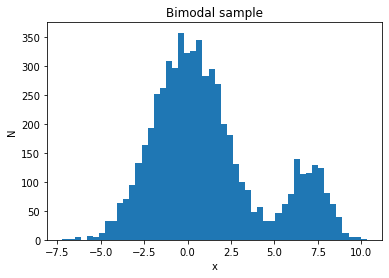

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Parameters of the normal distributions
mu1 = 0
sig1 = 2
N1 = 5000

mu2 = 7
sig2= 1
N2= 1000

# Generate points
x1 = np.random.normal(mu1, sig1, N1)
x2 = np.random.normal(mu2, sig2, N2)

x= np.append(x1,x2)

# Generate histogram
count, bins, ignored = plt.hist(x, 50)

plt.title('Bimodal sample')
plt.ylabel('N')
plt.xlabel('x')
plt.show()

Next, use different kernels to estimate the PDF

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_002.png)

See: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py

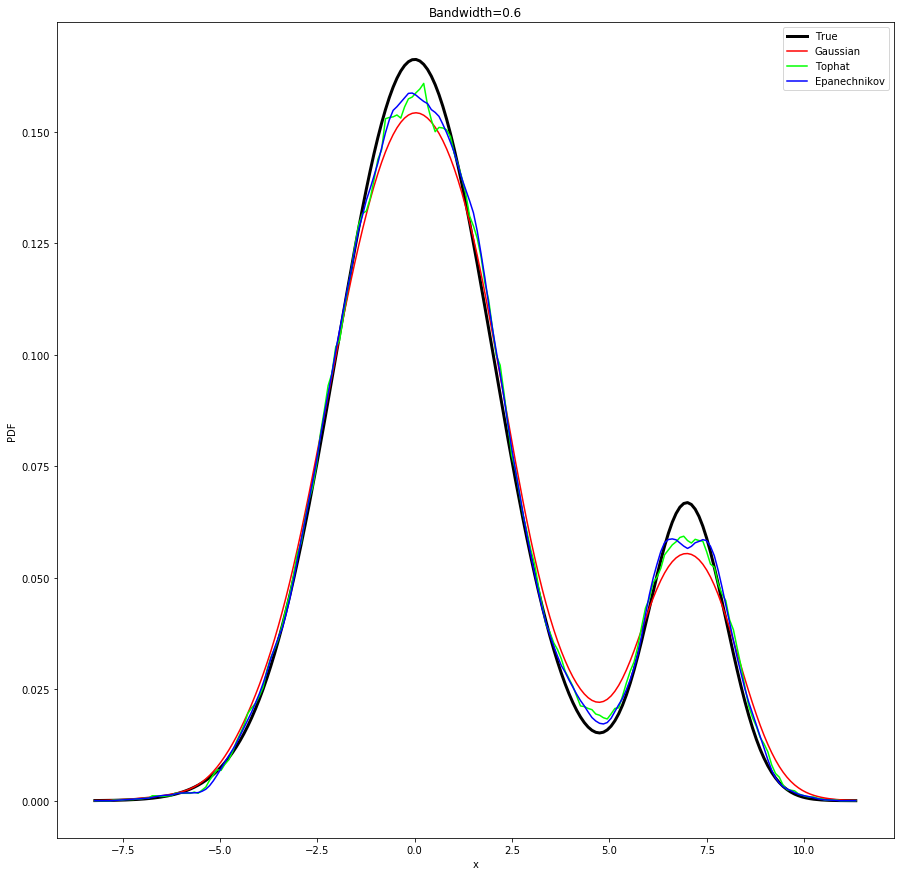

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as scp
from sklearn.neighbors import KernelDensity

fig = plt.figure(frameon=False)
fig.set_size_inches(15,15)

# Values to sample the PDF
xpdf= np.linspace(x.min()-1,x.max()+1.,200)
xpdf= xpdf.reshape(-1, 1)

# Reshape sample to use with KernelDensity
xkd= x.reshape(-1, 1)

# Generate and plot true PDF
ypdf= ( N1*scp.norm.pdf(xpdf,mu1,sig1) + N2*scp.norm.pdf(xpdf,mu2,sig2) ) / (N1+N2)
plt.plot(xpdf,ypdf,color="#000000",linewidth=3,label="True")


# Plot kernel estimations. Notice that score_samples(X) returns
# the log-density, so we have to use np.exp to get the PDF
#
# Try different values of bandwidth
BW= 0.6

# Gaussian kernel
kde_G = KernelDensity(kernel='gaussian', bandwidth=BW).fit(xkd)
ypdf_G= np.exp(kde_G.score_samples(xpdf)) 
plt.plot(xpdf,ypdf_G,color="#FF0000",label="Gaussian")

# Tophat kernel
kde_TH = KernelDensity(kernel='tophat', bandwidth=BW).fit(xkd)
ypdf_TH= np.exp(kde_TH.score_samples(xpdf)) 
plt.plot(xpdf,ypdf_TH,color="#00FF00",label="Tophat")

# Epanechnikov kernel
kde_EP = KernelDensity(kernel='epanechnikov', bandwidth=BW).fit(xkd)
ypdf_EP= np.exp(kde_EP.score_samples(xpdf)) 
plt.plot(xpdf,ypdf_EP,color="#0000FF",label="Epanechnikov")

plt.title("Bandwidth="+str(BW))
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.show()